## 1. Le modèle 

### 1.1 Principe

La régression logistique est un méthode d'apprentissage supervisée très utile pour expliquer / prédire une variable discrète (à l'opposé de continu) lorsque le jeu de données comporte de nombreuses variables catégorielles.

### 1.2 Notations

Soit Y la variable à prédire / expliquée (dans notre cas, il s'agit de la souscription ou non à l'option de deposit à long terme) et X = (X1, X2, ..., Xn) les variables explicatives

Dans le cadre de la regression logistique binaire, la variable Y prend deux modalités {0,1}. Les variables $X_{i}$ sont exclusivement binaires ou continues.

- Soit $\Omega$ un ensemble de n échantillons (ici n = 45211) comportant $n_{1}$ (respectivement $n_{0}$)) observations correspondant à la modalité 1 (respectivement 0) de Y (dans notre cas, $n_{1}$ = 5289 et $n_{0}$ = 39922).
- $P(Y=1)$ est la probabilité a priori pour que Y = 1. Pour simplifier on la notera p(1)
- $p(X \vert 1)$ est la distribution conditionnelle des X sachant la valeur prise par Y. 
- La probabilité a posteriori d'obtenir la modalité 1 de Y (resp. 0) sachant la valeur prise par X est $p(1 \vert X)$ (resp. $p(0 \vert X)$)


### 1.3 Le modèle LOGIT

On désigne par le terme LOGIT de $p(1 \vert X)$ l'expression suivante: $\ln {\frac  {p(1\vert X)}{1-p(1\vert X)}}=b_{0}+b_{1}x_{1}+...+b_{n}x_{n}$

- il s'agit bien d'une regression car on cherche à montrer une relation de dépendance entre une variable à expliquer tet une série de variables explicatives
- il s'agit d'une regression logistique car la loi de probabilité est modélisée par une loi logistique (https://fr.wikipedia.org/wiki/Fonction_logistique_(Verhulst))

#### Q.1 Pourquoi la fonction logistique est-elle intéressante ? Notamment par rapport à une fonction affine 

Réponse: Elle est beaucoup moins sensible aux outliers dans le cas d'une classification binaire

Expliquer / prédire une variable binaire consiste alors à estimer au mieux les coefficients $b_{i}$ ci-dessus. Ensuite on peut retrouver la probabilité conditionnelle par la formule suivante: 

$p(1\vert X)={\frac  {e^{{b_{0}+b_{1}x_{1}+...+b_{n}x_{n}}}}{1+e^{{b_{0}+b_{1}x_{1}+...+b_{n}x_{n}}}}}$

Il existe plusieurs méthodes de resolutions / d'estimations de ces paramètres (voir principe du maximum de vraisemblance et algo méthode de résolution numérique Newton-Raphson). Nous allons nous concentrer plus sur l'interprétation des résultats dans le cas d'une classification plutot que sur les méthodes de résolution.

## 2. Implémentation

### 2.1 Import des librairies et du jeu de données

In [2]:
import pandas as pd
import numpy as np
from Preprocessing import preprocessing
import statsmodels.api as sm
from sklearn import linear_model

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

On réutilise le jeu de données sur le marketing dans la banque

In [3]:
df = pd.read_csv("bank-full.csv",  sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2.2 Preprocessing des données (voir le package en détails)

Comme précisé plus haut, on a besoin de variables exclusivement binaires ou continues. 

#### Q.2 Quel type d'encoding des variables catégorielles doit-on mettre en place pour ce faire ? 

Réponse: One-hot encoding (chaque modalité de variables multicatégorielles est transformée en variable binaire)

#### Consigne 1: Mettre en place cet encoding 

Vous pouvez faire cet encoding directement via des instructions dans le notebook. Mais le mieux étant de créer un package dans un script python en dehors du notebook pour faire ce processing et appeler ensuite ce package dans le notebook (comme si vous appeliez un package de pandas ou numpy)

In [4]:
#La variable à prédire est y_bin (construite à partir de y)
#Les variables numériques sont: age, balance, day (à voir si on ne la transforme pas en catégorielle), duration, campaign, pdays, previous
#Les variables catégorielles binaires sont: default, housing, loan
#Les varaibles multi-catégorielles non ordinales sont: job, marital, education, contact, month, poutcome
from Preprocessing import preprocessing

var_bin = ["default", "housing", "loan", "y"]
var_cat = ["job","marital", "education", "contact", "month", "poutcome"]

df_prep = preprocessing(df, var_bin, var_cat)

In [5]:
df_prep.head()

,age,balance,day,duration,campaign,pdays,previous,default_bin,housing_bin,loan_bin,y_bin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Introduire une étape de normalisation 

On regarde la distribution des variables explicatives, pour regarder les différences d'échelles

In [6]:
df_prep.mean()

age                      40.936210
balance                1362.272058
day                      15.806419
duration                258.163080
campaign                  2.763841
pdays                    40.197828
previous                  0.580323
default_bin               0.018027
housing_bin               0.555838
loan_bin                  0.160226
y_bin                     0.116985
job_blue-collar           0.215257
job_entrepreneur          0.032890
job_housemaid             0.027427
job_management            0.209197
job_retired               0.050076
job_self-employed         0.034925
job_services              0.091880
job_student               0.020747
job_technician            0.168034
job_unemployed            0.028820
job_unknown               0.006370
marital_married           0.601933
marital_single            0.282896
education_secondary       0.513194
education_tertiary        0.294198
education_unknown         0.041074
contact_telephone         0.064276
contact_unknown     

On applique alors une normalisation des données de type min max afin d'avoir toutes les variables entre 0 et 1. En l'occurence, cela n'apportera pas énormément dans le sens ou l'on veut appliquer une regression logistique (moins sensible aux échelles) mais il serait primordial d'en mettre une en place si on appliquait un modèle linéaire.

In [9]:
df_norm = (df_prep - df_prep.min()) / (df_prep.max() - df_prep.min())
df_norm.head()

,age,balance,day,duration,campaign,pdays,previous,default_bin,housing_bin,loan_bin,y_bin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Consigne 2: Séparer l'échantillon de données en base d'apprentissage et base de test (70% / 30%)

In [10]:
from sklearn.model_selection import train_test_split

X = df_norm.drop(["y_bin"], axis = 1)
y = df_norm["y_bin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(30291, 42) (14920, 42) (30291,) (14920,)


In [11]:
#On observe le même taux de souscritpion dans le jeu de données d'apprentissage et dans celui de test
print(y_train.value_counts().apply(lambda x: x/len(y_train)))
print(y_test.value_counts().apply(lambda x: x/len(y_test)))

0.0    0.883002
1.0    0.116998
Name: y_bin, dtype: float64
0.0    0.883043
1.0    0.116957
Name: y_bin, dtype: float64


Il faudrait sans doute appliquer une normalisation des données sinon on aura un biais dans nos données

### 2.3 Mise en place d'un modèle via le package scikit learn LogisticRegression

#### Consigne 3: Utiliser la fonction de scikit learn permettant de mettre en place une régression logistique pour entrainer un modèle 

On commence par regarder les différents hyperparamètres à optimiser pour mettre notre regression logistique en place

In [12]:
linear_model.LogisticRegression?

Notre dataset ne contient pas beaucoup d'observations (seulement quelques dizaines de milliers), on peut donc se dire qu'un solver liblinear serait approprié pour résoudre un tel problème.

In [13]:
model = linear_model.LogisticRegression(penalty='l1', tol=0.001, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

In [19]:
print(model.intercept_, model.coef_)

[-2.49403675] [[ 0.          0.36593491  0.23434544 20.53731369 -5.07080743  0.
   0.          0.         -0.71606197 -0.41351147 -0.25587462 -0.24788147
  -0.34563972 -0.12849577  0.27123447 -0.24003717 -0.19474907  0.31633528
  -0.1674127  -0.11768334 -0.38504138 -0.21162156  0.08381301  0.23994518
   0.4128393   0.19887124 -0.07879038 -1.60937167 -0.8142392   0.4688778
  -0.33283586 -1.36485617 -0.97315727  0.23994612  1.36439289 -0.53030442
  -0.92941079  0.8663269   0.75638802  0.21403523  2.33676017 -0.11356772]]


In [20]:
X_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default_bin', 'housing_bin', 'loan_bin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [21]:
for i in range(len(X_train.columns)):
    print(X_train.columns[i], np.exp(model.coef_[0][i]))

age 1.0
balance 1.4418613858028417
day 1.2640810843866708
duration 830313327.1891961
campaign 0.006277349549051123
pdays 1.0
previous 1.0
default_bin 1.0
housing_bin 0.48867288020140315
loan_bin 0.6613239499914798
job_blue-collar 0.7742390380561331
job_entrepreneur 0.7804524412944248
job_housemaid 0.7077674366394006
job_management 0.8794172800948866
job_retired 1.3115825629223226
job_self-employed 0.7865986230279876
job_services 0.8230411568359093
job_student 1.3720902095956375
job_technician 0.8458504570196447
job_unemployed 0.8889775140725154
job_unknown 0.6804224796134007
marital_married 0.8092708965173848
marital_single 1.0874255383512692
education_secondary 1.2711794626926347
education_tertiary 1.511102173004787
education_unknown 1.2200248641016247
contact_telephone 0.9242336438564561
contact_unknown 0.20001324806349696
month_aug 0.44297621357581524
month_dec 1.598199692263699
month_feb 0.7168878547731427
month_jan 0.25541741051350153
month_jul 0.37788805944155796
month_jun 1.2711

#### Consigne 4: Faire des prédictions sur l'échantillon de test

In [22]:
y_pred_test = model.predict(X_test)

En faisant des prédictions sur l'échantillon de test, on se rend compte que le modèle prédit deux fois moins de personnes susceptibles de prédire qu'il y en a dans l'échantillon. Le modèle a tendance a être "frileux" (prédire moins de 1 que de 0) pour avoir une meilleur accuracy. Il est possible de changer ça en jouant sur l'hyperparamètre class_weight

In [23]:
pd.DataFrame(y_pred_test, columns = ["pred"]).pred.value_counts().apply(lambda x: x/len(y_pred_test))

0.0    0.936729
1.0    0.063271
Name: pred, dtype: float64

In [25]:
y_test.value_counts().apply(lambda x: x/len(y_test))

0.0    0.883043
1.0    0.116957
Name: y_bin, dtype: float64

### 2.4 Analyse des différentes métriques

#### Consigne 5: Créez une matrice de confusion pour analyser les résultats

In [26]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[12831,   344],
       [ 1145,   600]])

#### Q.3: Combien a-t'on de TP (True Positif), TN (True Negatif), FP (False Positive) et FN (False Negative) ? 

In [27]:
tn, fp, fn, tp = cm_test.ravel()
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)
print("True Positive", tp)

True Negative 12831
False Positive 344
False Negative 1145
True Positive 600


#### Q.4 Quelle est l'accuracy du modèle ? Sa précision ? Son recall ? Son F-1 score ?

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy", round(accuracy_score(y_test, y_pred_test),4))
print("accuracy", (tp + tn)/ len(y_test))
#Sans normalisation: 0.90

accuracy 0.9002
accuracy 0.900201072386059


In [29]:
#Parmi les personnes indiquées par le modèle comme ayant souscrit à l'offre, 63% ont en effet bien souscrit à l'offre.
print("precision", round(precision_score(y_test, y_pred_test),4))
print("precision", tp/(tp+fp))
#Sans normalisation: 0.64

precision 0.6356
precision 0.635593220338983


In [30]:
#Le recall correspond à la capacité du modèle d'identifier l'ensemble des personnes ayant souscrit (il a réussi à en repérer 35%)
#Parmi l'ensemble des gens ayant souscrit à l'offre, seulement
print("recall", round(recall_score(y_test, y_pred_test),4))
print("recall", tp/(tp+fn))
#Sans normalisation: 0.35

recall 0.3438
recall 0.3438395415472779


In [31]:
print("f1-score", f1_score(y_test, y_pred_test))

f1-score 0.4462625511342506


On remarque qu'il n'y a pas de différence entre le modèle entrainé sur les données brutes et sur les données normalisées.

#### Consigne 6: Construire une courbe ROC et une courbe Precision - Recall à partir des résultats

Pour réaliser une courbe ROC, il est nécessaire de calculer deux taux: 
- Le taux de faux positifs 
- Le taux de vrais positifs 

#### Classification pure

La courbe ROC n'est pas pertinente à partir de prédictions directes (0 ou 1) mais seulement à partir des proabilités de chaque classe (0 ou 1) afin d'avoir des résultats différents (TPR et FRP) en fonction des différents seuils que l'on pourrait tester.

In [32]:
from sklearn import metrics 
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

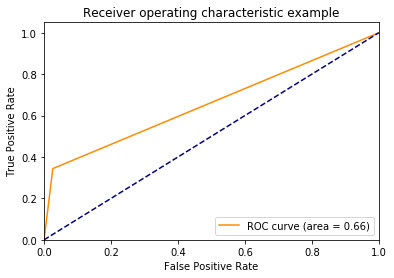

In [33]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Regression grâce à predict proba

In [34]:
#Cette série représente les prédictions estimant la probabilité que les clients de la base de test souscrient au dépôt de long terme
y_pred_test_proba = model.predict_proba(X_test)
y_pred_test_proba[:,1]

array([0.00863405, 0.02982977, 0.19939705, ..., 0.05090222, 0.28681481,
       0.27594053])

In [35]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)

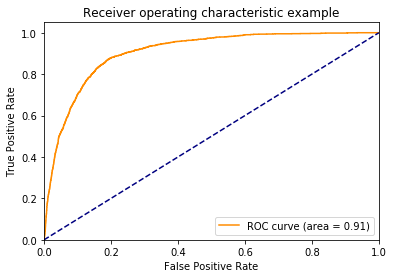

In [36]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Consigne 7: Faire des prédictions sur l'échantillon d'apprentissage et calculer toutes les métriques ci-dessus

In [37]:
y_pred_train = model.predict(X_train)

In [38]:
pd.DataFrame(y_pred_train, columns = ["pred"]).pred.value_counts().apply(lambda x: x/len(y_pred_train))

0.0    0.937671
1.0    0.062329
Name: pred, dtype: float64

In [39]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_train, y_pred_train)
cm_test

array([[26099,   648],
       [ 2304,  1240]])

In [40]:
print("accuracy", round(accuracy_score(y_train, y_pred_train),4))
print("precision", round(precision_score(y_train, y_pred_train),4))
print("recall", round(recall_score(y_train, y_pred_train),4))

accuracy 0.9025
precision 0.6568
recall 0.3499


In [41]:
y_pred_train_proba = model.predict_proba(X_train)
y_pred_train_proba[:,1]

array([0.06270456, 0.23550101, 0.16750606, ..., 0.07797999, 0.0196442 ,
       0.00647246])

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)

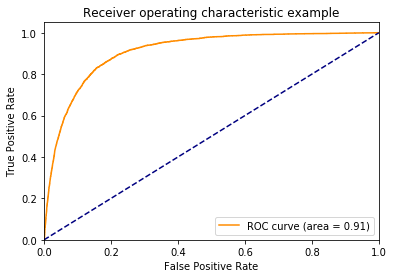

In [43]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 2.5 Etude de l'overfitting (surapprentissage) du modèle

#### Consigne 8: Comparer avec les résultats des prédictions sur l'échantillon d'apprentissage et l'échantillon de test 

On observe à peu près les mêmes résultats entre test et train

Dorénavant, on va créer trois bases de données: une base d'apprentissage, une de test et une dernière de validation pour laquelle on est sur que le modèle n'a jamais vu les données

#### Méthode 1: séparation des observations à la main

Le découpage suivant donne une répartition inégale des 0 et 1, il permet de voir comment le modèle s'adapte à des taux de souscription varaible en fonction des échantillons.

In [44]:
X = df_prep[:int(0.7*len(df_prep))].drop(["y_bin"], axis = 1)
y = df_prep[:int(0.7*len(df_prep))]["y_bin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_valid = df_prep[int(0.7*len(df_prep)):].drop(["y_bin"], axis = 1)
y_valid = df_prep[int(0.7*len(df_prep)):]["y_bin"]

print(np.shape(X_train), np.shape(X_test), np.shape(X_valid), np.shape(y_train), np.shape(y_test), np.shape(y_valid))

(21203, 42) (10444, 42) (13564, 42) (21203,) (10444,) (13564,)


#### Méthode 2: séparation des observations de manière aléatoire

In [45]:
#On peut utiliser df_norm ou df_prep
#X = df_norm.drop(["y_bin"], axis = 1)
#y = df_norm["y_bin"]
#
#X, X_valid, y, y_valid = train_test_split(X, y, test_size=0.30, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#
#print(np.shape(X_train), np.shape(X_test), np.shape(X_valid), np.shape(y_train), np.shape(y_test), np.shape(y_valid))

In [46]:
model = linear_model.LogisticRegression(solver='liblinear', class_weight = "balanced")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
dic_y = {"train": y_train, "test": y_test, "valid": y_valid}
dic_X = {"train": X_train, "test": X_test, "valid": X_valid}
dic_pred = {}

for nom in ["train", "test", "valid"]:
    dic_pred[nom] = model.predict(dic_X[nom])

In [48]:
#On regarde la répartition des prédictions
for nom in ["train", "test", "valid"]:
    print("true" + nom)
    print(dic_y[nom].value_counts().apply(lambda x: x/len(dic_y[nom])))
    print("pred" + nom)
    print(pd.DataFrame(dic_pred[nom], columns = ["pred"]).pred.value_counts().apply(lambda x: x/len(dic_pred[nom])))

truetrain
0    0.941801
1    0.058199
Name: y_bin, dtype: float64
predtrain
0    0.845588
1    0.154412
Name: pred, dtype: float64
truetest
0    0.941976
1    0.058024
Name: y_bin, dtype: float64
predtest
0    0.844217
1    0.155783
Name: pred, dtype: float64
truevalid
0    0.745724
1    0.254276
Name: y_bin, dtype: float64
predvalid
0    0.761722
1    0.238278
Name: pred, dtype: float64


In [49]:
for nom in ["train", "test", "valid"]:
    print("accuracy " + nom, round(accuracy_score(dic_y[nom], dic_pred[nom]),4))


accuracy train 0.8911
accuracy test 0.8863
accuracy valid 0.7463


In [50]:
for nom in ["train", "test", "valid"]:
    print("precision " + nom, round(precision_score(dic_y[nom], dic_pred[nom]),4))

precision train 0.336
precision test 0.3215
precision valid 0.5012


In [51]:
for nom in ["train", "test", "valid"]:
    print("recall " + nom, round(recall_score(dic_y[nom], dic_pred[nom]),4))

recall train 0.8914
recall test 0.863
recall valid 0.4697


In [52]:
for nom in ["train", "test", "valid"]:
    print("F1 " + nom, round(f1_score(dic_y[nom], dic_pred[nom]),4))

F1 train 0.488
F1 test 0.4684
F1 valid 0.485


In [53]:
dic_fpr = {}
dic_tpr = {}
dic_threshold = {}
dic_auc = {}

for nom in ["train", "test", "valid"]:
    dic_fpr[nom], dic_tpr[nom], thresholds = metrics.roc_curve(dic_y[nom], model.predict_proba(dic_X[nom])[:,1])
    dic_auc[nom] = metrics.auc(dic_fpr[nom], dic_tpr[nom])

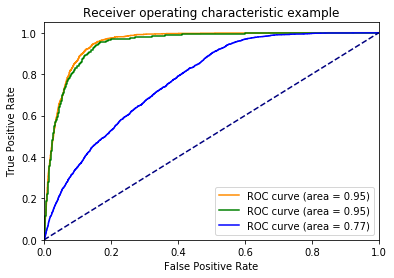

In [54]:
plt.figure()

dic_colors = {"train": "darkorange", "test": "green", "valid": "blue"}

for nom in ["train", "test", "valid"]:
    plt.plot(dic_fpr[nom], dic_tpr[nom], color = dic_colors[nom] , label='ROC curve (area = %0.2f)' % dic_auc[nom])
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Q.5 Observe t'on un phénomène particulier ? 

### 2.6 Etude de l'arbitrage biais - variance (performance - robustesse)

Il s'agit de rechercher le "meilleur" set d'hyperparamètres pour notre modèle. On essaie donc de chercher le meilleur arbitrage entre performance et robustesse du modèle. 

La performance consiste à avoir des scores élevés pour les différents métriques testées et la robustesse signifie avoir des métriques similaires au cours des différents apprentissages de la cross validation.

Lors de l'optimisation des hyperparamètres, il est possible de spécifier le score que l'on cherche à maximiser. Il semblerait qu'il y ait deux stratégies possibles pour la banque: 
- contacter un maximum de personnes pour avoir le plus de souscriptions possibles (avoir le recall le plus grand possible)
- appeler un nombre limité de clients mais particuliérement bien ciblés (avoir la meilleure précision possible).

N'ayant pas d'indications concernant la stratégie que la banque cherche à adopter, on a choisi de maximiser le f1 score.

#### Optimisation des hyperparamètres

In [55]:
from sklearn.model_selection import train_test_split

X = df_norm.drop(["y_bin"], axis = 1)
y = df_norm["y_bin"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(30291, 42) (14920, 42) (30291,) (14920,)


On va jouer sur deux hyperparamètres qui nous semblent pertinents: le solver et la pondération des classes

On peut se permettre de faire une gridsearchCV pour tester toutes les combinaisons possibles car il n'y en a que 6.

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

solver_options = ['newton-cg', 'liblinear', 'sag']
#multi_class_options = ['ovr', 'multinomial']
#C_options = [0.1, 1, 10]
class_weight_options = [None, 'balanced']

param_grid = dict(solver = solver_options, class_weight = class_weight_options)

#multi_class = multi_class_options
#C = C_options

grid = GridSearchCV(LogisticRegression(max_iter = 500), param_grid, cv=5, scoring = 'f1')

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=500, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': [None, 'balanced'],
                         'solver': ['newton-cg', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

On crée enfin un dataframe compilant les résultats afin de pouvoir comparer les différentes combinaisons d'hyperparamètres testées

In [62]:
df_results = pd.DataFrame(grid.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.406642,0.023138,0.005781,0.000635,None,newton-cg,"{'class_weight': None, 'solver': 'newton-cg'}",0.404276,0.446312,0.421769,0.434450,0.428571,0.427076,0.013962,5
1,0.176701,0.016504,0.006072,0.000907,None,liblinear,"{'class_weight': None, 'solver': 'liblinear'}",0.408915,0.446312,0.421769,0.432950,0.429658,0.427921,0.012374,4
2,0.301872,0.023391,0.004702,0.000834,None,sag,"{'class_weight': None, 'solver': 'sag'}",0.403883,0.447761,0.421769,0.432950,0.428571,0.426987,0.014357,6
3,0.476219,0.033699,0.005284,0.000393,balanced,newton-cg,"{'class_weight': 'balanced', 'solver': 'newton...",0.558782,0.539713,0.559885,0.552529,0.560429,0.554267,0.007807,3
4,0.180521,0.013459,0.005527,0.000521,balanced,liblinear,"{'class_weight': 'balanced', 'solver': 'liblin...",0.558516,0.539455,0.559615,0.552798,0.561831,0.554443,0.008066,2
5,0.966138,0.196828,0.004646,0.000586,balanced,sag,"{'class_weight': 'balanced', 'solver': 'sag'}",0.560115,0.539971,0.559346,0.552529,0.561130,0.554618,0.007923,1


On remarque que la class_weight est sur balanced, on gagne 0.13 en f1-score, ce qui est conséquent. De plus, la variance des résultats sur les différents sous échantillons diminue de moitié (de 0.014 à 0.007). En revanche le solver n'a que peu d'importance puisque les résultats sont semblables sur les 3 solvers. 